2022 calculate size of mac marsh threshold areas



**Date** August 2022

Import some useful modules

In [1]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
#from datacube.storage import masking
import os
#sys.path.append('../Scripts/')
#import dea_spatialtools
import pandas as pd
import numpy as np


In [2]:
import sys
sys.path.insert(1, '../Tools/')
import dea_tools.datahandling
from datacube.utils import masking
import dea_tools.spatial #hopefully this replaces dea_spatialtools

In [3]:
from datacube.utils.cog import write_cog

## Load in the aerial raster

In [4]:
#open the aerial raster
aerial = xr.open_rasterio('/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/cewo_20160628_extents_again.tif')

#drop the empty dimension
aerial = aerial.squeeze()

process the aerial raster for comparison

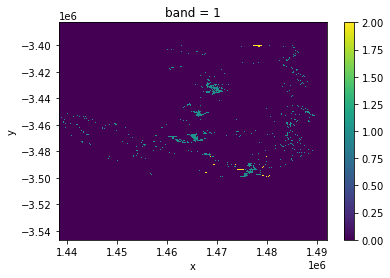

In [5]:
aerial.plot()
plt.show()

Notes: 0 is the nodata value, 1 is the wet value, and 2 is the storage value.

In [6]:
#remove the top row of our aerial raster as it does not overlap the thresholded rasters
aerial = aerial.where(aerial.y[0:6563])

In [ ]:
# remove nodata
aerial2=aerial.where(aerial!=65535.)
aerial2=aerial2.where(aerial!=-3.4028234663852886e+38)
aerial2=aerial2.where(aerial!=0)
aerial2.plot()
plt.show()

turn storages into the same value as other wet areas

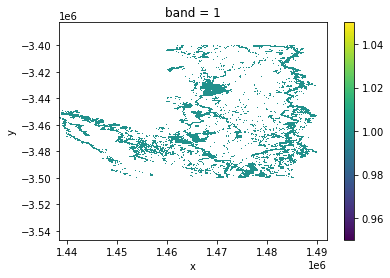

In [70]:
#   
aerial3 = aerial2>=1
#remove nodata/0 to only get wet areas from the aerial data
aerialwet = aerial3.where(aerial3!=0)
aerialwet.plot()
plt.show()

calculate the mapped area

In [9]:
# #calculate the total area
# study_area = cewo_fix
# total_area=np.round((study_area.count()*25*25)/(1000*1000),2)
# print(total_area.values,'km^2')

In [10]:
# cewoCount = cewo_fix2.count()
# #cewoarea=numpy.round((cewoCount*25*25)/(1000*1000),2)
# cewoarea=np.round((cewoCount*25*25)/(1000*1000),2)
# print(cewoarea.values,'km^2')

In [11]:
# nonwet_area_c = total_area-cewoarea
# print(nonwet_area_c .values,'km^2')

In [12]:
#write this out as a cog
#write_cog(cewo_fix2, fname='/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/cewo_20160628_extents_2022b.tif')

----fixme

## Build the loop to load our rasters and calculate our %coverage

thresholds are our chosen thresholds for the TCW; these need to match the filenames, and are not set here.

In [13]:
thresholds = ['-0','-100','-200','-300','-400','-500','-600']

make a dataframe to fill with our results

In [14]:
comparison_df_pixels = pd.DataFrame(columns=['TCW','notTCW','%ofwet','%ofdry'],index=thresholds)
comparison_df_area = pd.DataFrame(columns=['TCW km^2','notTCW km^2','%ofwet km^2', '%ofdrykm^2'],index=thresholds)

In [15]:
xr.__version__

'0.16.0'

#testing here: note you have to run the next cell to get this to work..

threshold is  -600


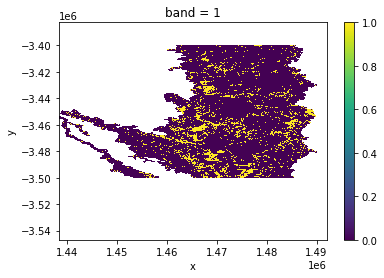

In [30]:
#open our thresholded TCW file  
print ('threshold is ',thresholds[i])
ThresholdData = xr.open_rasterio(thresholdFiles[i]) #thresholded TCW
ThresholdData = ThresholdData.squeeze() #drop additional dimension of length 1
ThresholdData=ThresholdData.where(ThresholdData!=-3.4028234663852886e+38)
ThresholdData.plot()
plt.show()

--> here is where you count total area!

In [31]:
thresholdCount=ThresholdData.count()
thresholdarea=np.round((thresholdCount*25*25)/(1000*1000),2)
print(thresholdarea.values,'km^2')

threshold is  -600
2750.8 km^2


In [38]:
wetData = ThresholdData.where(ThresholdData==1)
wetCount=wetData.count()
wetarea=np.round((wetCount*25*25)/(1000*1000),2)
print('wet count', wetCount.data, 'wetarea',wetarea.data,'km^2')

wet count 584575 wetarea 365.36 km^2


In [39]:
wetstorData=wetData.where(aerial.data!=2.0) #(not working at the moment?!)

ValueError: operands could not be broadcast together with shapes (6563,2144) (6565,2146) () 

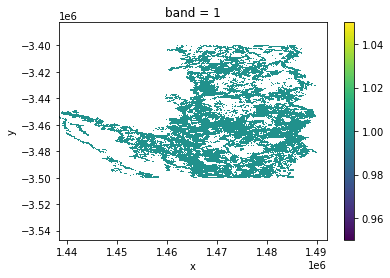

In [34]:
dryData = ThresholdData.where(ThresholdData==1)
dryData.plot()
plt.show()


In [24]:
#make a list of the files corresponding to our set thresholds
thresholdFiles =[]
for i in range(0, len(thresholds)):
    #thresholdFiles.append('/g/data/r78/rjd547/CEWO_Project/MacquaThresholdDatarsh/bexnessresults/thresholded_wetness/clipped/t{0}_Mac_14_-35_20160627__20160629_clipped.tif'.format(thresholds[i]))
    thresholdFiles.append('/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/2022/2022t{0}_Mac_14_-35_20160627__20160629.tif'.format(thresholds[i]))
    print ('threshold is ',thresholds[i])
    
    #open our thresholded TCW file    
    ThresholdData = xr.open_rasterio(thresholdFiles[i]) #thresholded TCW
    ThresholdData = ThresholdData.squeeze() #drop additional dimension of length 1
      
    #remove nodata vals around outside of map 
    ThresholdData=ThresholdData.where(ThresholdData!=-3.4028234663852886e+38)
    #count map area
    mapCount=ThresholdData.count()
    maparea=np.round((mapCount*25*25)/(1000*1000),2)
    print('total map area is',maparea.values,'km^2')
      
    #calculate wet and dry areas
    wetData=ThresholdData.where(ThresholdData==1)
    dryData=ThresholdData.where(ThresholdData==0)
    
#     #remove storages?
#     ThresholdData=ThresholdData.where(cewo_fix.data!=2.0) #(not working at the moment?!)
#     thresholdCount=ThresholdData.where(ThresholdData==1.).count()
#     thresholdarea=np.round((thresholdCount*25*25)/(1000*1000),2)
#     print(thresholdarea.values,'km^2')
    
# #     both = cewo_fix2.where(ThresholdData==1)
# #     bothCount = both.count()
#     #botharea=numpy.round((thresholdCount*25*25)/(1000*1000),2)
#     botharea=np.round((bothCount*25*25)/(1000*1000),2)
#     comparison_df_pixels.loc[thresholds[i]]=[thresholdCount.data, cewoCount.data, bothCount.data, np.round(((bothCount/cewoCount)*100).data,decimals=2)]
#     comparison_df_area.loc[thresholds[i]]=[thresholdarea.data, cewoarea.data, botharea.data, np.round(((botharea/cewoarea)*100).data,decimals=2)]
#     print(botharea)
#     plt.clf()
#     cewo_fix2.plot(cmap='Greens', vmin=0,vmax=1)
#     ThresholdData.plot(cmap='viridis',vmin=0,vmax=1)
    #both.plot(cmap='Wistia',vmin=0,vmax=1)
    #plt.show()
    #print('ready to save plots')
    
#     %matplotlib inline
#     plt.clf()
#     fig = plt.figure(figsize=(10,11))
#     ax=plt.gca()
#     cewo_fix2.plot(cmap='Greens', vmin=0,vmax=1, alpha=0.7,add_colorbar=False)
#     ThresholdData.plot(cmap='Greens',vmin=0,vmax=3,alpha=0.7,add_colorbar=False)
#     #both.plot(cmap='winter',vmin=0,vmax=1, alpha=0.7,add_colorbar=False)
    
#     #plt.title("TCW threshold "+thresholds[i])
#     ax.set_ylim((-3500000, -3400000))
#     print('ready to save plots')
#     #plt.savefig('/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/plots2022/'+"2022TCW_threshold_"+thresholds[i]+100321'.png')
#     #plt.show()

threshold is  -0
total map area is 2750.8 km^2
threshold is  -100
total map area is 2750.8 km^2
threshold is  -200
total map area is 2750.8 km^2
threshold is  -300
total map area is 2750.8 km^2
threshold is  -400
total map area is 2750.8 km^2
threshold is  -500
total map area is 2750.8 km^2
threshold is  -600
total map area is 2750.8 km^2


In [ ]:
# #make a list of the files corresponding to our set thresholds
# thresholdFiles =[]
# for i in range(0, len(thresholds)):
#     thresholdFiles.append('/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t{0}_Mac_14_-35_20160627__20160629_clipped.tif'.format(thresholds[i]))
#     print (thresholdFiles[i])
    
#     ThresholdData = xr.open_rasterio(thresholdFiles[i]) #thresholded TCW
#     #count total pixels
#     totalcount = xr.open_rasterio(thresholdFiles[i]).count()
#     notarea = np.round((totalcount*25*25)/(1000*1000),2)
#     print(notarea)
#     ThresholdData=ThresholdData.where(ThresholdData!=-3.4028234663852886e+38)
#     ThresholdData=ThresholdData.where(ThresholdData!=0)
#     ThresholdData=ThresholdData.where(cewo_fix.data!=2.0)
#     thresholdCount=ThresholdData.where(ThresholdData==1.).count()
#     #thresholdarea=numpy.round((thresholdCount*25*25)/(1000*1000),2)
#     thresholdarea=np.round((thresholdCount*25*25)/(1000*1000),2)
#     both = cewo_fix2.where(ThresholdData==1)
#     bothCount = both.count()
#     #botharea=numpy.round((thresholdCount*25*25)/(1000*1000),2)
#     botharea=np.round((bothCount*25*25)/(1000*1000),2)
#     comparison_df_pixels.loc[thresholds[i]]=[thresholdCount.data, cewoCount.data, bothCount.data, np.round(((bothCount/cewoCount)*100).data,decimals=2)]
#     comparison_df_area.loc[thresholds[i]]=[thresholdarea.data, cewoarea.data, botharea.data, np.round(((botharea/cewoarea)*100).data,decimals=2)]
#     print(botharea)
# #     plt.clf()
# #     cewo_fix2.plot(cmap='Greens', vmin=0,vmax=1)
# #     ThresholdData.plot(cmap='viridis',vmin=0,vmax=1)
# #     both.plot(cmap='Wistia',vmin=0,vmax=1)
# #     print('ready to save plots')
    
# #     %matplotlib inline
# #     plt.clf()
# #     fig = plt.figure(figsize=(10,11))
# #     ax=plt.gca()
# #     cewo_fix2.plot(cmap='Greens', vmin=0,vmax=1, alpha=0.7,add_colorbar=False)
# #     ThresholdData.plot(cmap='Greens',vmin=0,vmax=3,alpha=0.7,add_colorbar=False)
# #     both.plot(cmap='winter',vmin=0,vmax=1, alpha=0.7,add_colorbar=False)
# #     plt.title("TCW threshold "+thresholds[i])
# #     ax.set_ylim((-3500000, -3400000))
# #     print('ready to save plots')
# #     #plt.savefig('/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/plots2022/'+"3TCW_threshold_"+thresholds[i]+100321'.png')
# #     #plt.show()

In [ ]:
# #make a list of the files corresponding to our set thresholds
# thresholdFiles =[]
# for i in range(0, len(thresholds)):
#     thresholdFiles.append('/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t{0}_Mac_14_-35_20160627__20160629_clipped.tif'.format(thresholds[i]))
#     print (thresholdFiles[i])
    
#     ThresholdData = xr.open_rasterio(thresholdFiles[i]) #thresholded TCW
#     ThresholdData=ThresholdData.where(ThresholdData!=-3.4028234663852886e+38)
#     ThresholdData=ThresholdData.where(ThresholdData!=0)
#     ThresholdData=ThresholdData.where(cewo_fix.data!=2.0)
#     thresholdCount=ThresholdData.where(ThresholdData==1.).count()
#     #thresholdarea=numpy.round((thresholdCount*25*25)/(1000*1000),2)
#     thresholdarea=np.round((thresholdCount*25*25)/(1000*1000),2)
#     both = cewo_fix2.where(ThresholdData==1)
#     bothCount = both.count()
#     #botharea=numpy.round((thresholdCount*25*25)/(1000*1000),2)
#     botharea=np.round((bothCount*25*25)/(1000*1000),2)
#     comparison_df_pixels.loc[thresholds[i]]=[thresholdCount.data, cewoCount.data, bothCount.data, np.round(((bothCount/cewoCount)*100).data,decimals=2)]
#     comparison_df_area.loc[thresholds[i]]=[thresholdarea.data, cewoarea.data, botharea.data, np.round(((botharea/cewoarea)*100).data,decimals=2)]
#     print(botharea)
#     plt.clf()
#     cewo_fix2.plot(cmap='Greens', vmin=0,vmax=1)
#     ThresholdData.plot(cmap='viridis',vmin=0,vmax=1)
#     both.plot(cmap='Wistia',vmin=0,vmax=1)
#     print('ready to save plots')
    
#     %matplotlib inline
#     plt.clf()
#     fig = plt.figure(figsize=(10,11))
#     ax=plt.gca()
#     cewo_fix2.plot(cmap='Greens', vmin=0,vmax=1, alpha=0.7,add_colorbar=False)
#     ThresholdData.plot(cmap='Greens',vmin=0,vmax=3,alpha=0.7,add_colorbar=False)
#     both.plot(cmap='winter',vmin=0,vmax=1, alpha=0.7,add_colorbar=False)
#     plt.title("TCW threshold "+thresholds[i])
#     ax.set_ylim((-3500000, -3400000))
#     print('ready to save plots')
#     #plt.savefig('/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/plots2022/'+"3TCW_threshold_"+thresholds[i]+100321'.png')
#     #plt.show()

In [ ]:
comparison_df_area

In [ ]:
%matplotlib inline
plt.clf()
fig = plt.figure(figsize=(10,11))
ax=plt.gca()
#ax.set_facecolor('xkcd:khaki')
cewo_fix2.isel(x=range(0, len(cewo_fix2.x),10), y=range(0, len(cewo_fix2.y),10)).plot(cmap='Greens', vmin=0,vmax=1, alpha=0.5,add_colorbar=False)
ThresholdData.isel(x=range(0, len(cewo_fix2.x),10), y=range(0, len(cewo_fix2.y),10)).plot(cmap='Greens',vmin=0,vmax=2,alpha=0.5,add_colorbar=False)
both.isel(x=range(0, len(cewo_fix2.x),10), y=range(0, len(cewo_fix2.y),10)).plot(cmap='winter',vmin=0,vmax=1, alpha=0.5,add_colorbar=False)
plt.title("TCW threshold "+thresholds[i])
ax.set_ylim((-3500000, -3400000))
plt.show()

In [ ]:
#write table to csv
#plot.

In [ ]:
#comparison_df_pixels.to_csv('/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/Pixel_Comparison_Table_2022.csv',)

In [ ]:
(91171/158833)*100

In [ ]:
comparison_df_area

In [ ]:
#comparison_df_area.to_csv('/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/Area_Comparison_Table_2022.csv',)

In [ ]:
# ThresholdData = xr.open_rasterio(thresholdFiles[0]) #thresholded TCW
#

In [ ]:
%matplotlib inline
plt.clf()
cewo_fix.plot(vmin=0, vmax=2, cmap='magma')
plt.show()

In [ ]:
# cewo_fix2 =cewo_fix.where(cewo_fix!=65535.)
# cewo_fix2=cewo_fix2.where(cewo_fix2!=-3.4028234663852886e+38)
# cewo_fix2=cewo_fix2.where(cewo_fix2!=0)
# cewo_fix2=cewo_fix2.where(cewo_fix2!=2)

In [ ]:
#cewo_fix2.isel(x=range(0, len(cewo_fix2.x),10), y=range(0, len(cewo_fix2.y),10)).plot()

In [ ]:
# cewoCount = cewo_fix2.count()

In [ ]:
both = cewo_fix2.where(ThresholdData==1)

In [ ]:
thresholdCount=ThresholdData.where(ThresholdData==1.).count()

In [ ]:
thresholdCount

In [ ]:
bothCount = both.count()

In [ ]:
plt.clf()
cewo_fix2.isel(x=range(0, len(cewo_fix2.x),10), y=range(0, len(cewo_fix2.y),10)).plot()
ThresholdData.isel(x=range(0, len(cewo_fix2.x),10), y=range(0, len(cewo_fix2.y),10)).plot(cmap='magma')
both.isel(x=range(0, len(cewo_fix2.x),10), y=range(0, len(cewo_fix2.y),10)).plot(cmap='Wistia')
plt.show()

In [ ]:
thresholds

In [ ]:
comparison_df = pd.DataFrame(columns=['TCW','CEWO','both','%ofCEWO'],index=thresholds)

In [ ]:
comparison_df.loc['-0']=[thresholdCount.data, cewoCount.data, bothCount.data, numpy.round(((bothCount/cewoCount)*100).data,decimals=2)]

In [ ]:
comparison_df

In [ ]:
## #filter out both sets of nodata values as defined by CEWO
# cewoData = cewoData.where(cewoData!=-3.4028234663852886e+38) #remove no data vals
# cewoData = cewoData.where(cewoData!=0) #remove no data vals
# cewoData = cewoData.where(cewoData!=65535.) #remove no data vals
# #cewoData = cewoData.where(cewoData!=2.) #remove off river storages

In [ ]:
plt.clf()
cewoData.plot()
plt.show()

In [ ]:
cewoData

In [ ]:
ThresholdData

In [ ]:
plt.clf()
ThresholdData.plot()
plt.show()

In [ ]:
# ThresholdData=ThresholdData.where(ThresholdData!=-3.4028234663852886e+38)
# ThresholdData=ThresholdData.where(ThresholdData!=0)
# ThresholdData=ThresholdData.where(cewoData.data!=2.0)

In [ ]:
ThresholdData

In [ ]:
#ThresholdData=ThresholdData.where(ThresholdData!=-3.4028234663852886e+38)
#ThresholdData=ThresholdData.where(ThresholdData!=0)
#ThresholdData=ThresholdData.where(cewoData.data!=2.0)

In [ ]:
plt.clf()
ThresholdData.plot()
plt.show()

In [ ]:
cewoData2=cewoData.where(cewoData!=65535.)
cewoData2 = cewoData2.where(cewoData2!=-3.4028234663852886e+38) #remove no data vals
cewoData2 = cewoData2.where(cewoData2!=0) #remove no data vals
cewoData2 = cewoData2.where(cewoData2.data!=2.0) #remove storages

In [ ]:
cewo_comp = cewo_comp.where(cewo_comp!=-3.4028234663852886e+38)
print(cewo_comp.count())
cewo_comp = cewo_comp.where(cewo_comp!=0)
print(cewo_comp.count())
cewo_comp = cewo_comp.where(cewo_comp!=65535.)
print(cewo_comp.count())
cewo_comp = cewo_comp.where(cewo_comp!=2.0)
print(cewo_comp.count())

In [ ]:
cewoData2.max()

In [ ]:
cewo_comp.size, ThresholdData.size

In [ ]:
print(cewo_comp.count(), ThresholdData.count())

In [ ]:
cewoData2.plot() 
plt.show()

In [ ]:
cewo

Shouldn't have to do this again but here is the reproject to template function, with intro

In [ ]:
# output = SpatialTools.reproject_to_template(cewo_compFile,thresholdFiles[0],'/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/no_storages/cewo_20160628_test.tif')
# output = None